# ANALYSIS ON THE IMPACT OF LOCKDOWN ON THE AIR QUALITY

Our lives, as we probably are aware,have grounded to a halt in the course of the most recent few months. The pandemic has diminished the greater part of our exercises and constrained us inside our own homes. While the entire circumstance, right now, appears to be somewhat depressing, but, all isn't lost. It has been ascertained that the absence of human collaboration with the outside world has prompted a positive effect on the earth. There have been reports of bluer skies, blossoming greenery and animals returning back to their natural surroundings.

## SUMMARY

   * INTRODUCING THE DATASET
    * Data extraction from relevant data sources
    * Exporting all .csv files into a single file
    * Defining variables
    
    
   * VISUALIZATION OF DATASET
    * Prelockdown : NO2, PM2.5, PM10 graphs
    * Postlockdown : NO2, PM2.5, PM10 graphs
    * Timeline Graphs
    * Correlations Matrices
    * HeatMaps


   * BUILDING MODELS
    * Multiple Linear Regression Analysis
        * with combined features
        * with indiviual features
    * Arima Model


   * MODEL PREDICTIONS
    * Model Accuracy Scores (both Pre and Post Lockdowns)
    * Air Quality Level Predictions


   * CONCLUSIONS
    

**Importing all Libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sp
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### INTRODUCING THE DATASET

The dataset has been taken from Europeon Environment Agency [Website](https://discomap.eea.europa.eu/Index//). We have extracted weekly data, indiviually, for particulate matter i.e. NO2, PM2.5 and PM10 for the year 2018, 2019 and 2020.<br/>
Since, the analysis is aimed only on the Eurpeon Countries which are affected the most, therefore, a total of 45 .csv files were extracted for 15 countries (each containing particular Air Pollutant data).<br/>
These .csv files are combined in a single source of file using python code for our use for the analysis.


In [2]:
pn=pd.read_csv('files/All_Data.csv')

In [3]:
pn

,AirPollutant,AirQualityLevel,FilterStation,Country,TypeOfMeasurementStation,City,datebegin,validity_notation
0,PM10,31.6,1,Denmark,background,København,1/1/2018,1
1,PM10,16.7,1,Denmark,background,København,1/2/2018,1
2,PM10,11.2,1,Denmark,background,København,1/3/2018,1
3,PM10,8.5,1,Denmark,background,København,1/4/2018,1
4,PM10,6.4,1,Denmark,background,København,1/5/2018,1
...,...,...,...,...,...,...,...,...
296228,PM2.5,4.5,1,United Kingdom,traffic,London,23/05/2020,1
296229,PM2.5,5.0,1,United Kingdom,traffic,London,24/05/2020,1
296230,PM2.5,6.6,1,United Kingdom,traffic,London,27/05/2020,1
296231,PM2.5,5.7,1,United Kingdom,traffic,London,31/05/2020,1


### Explaination of the DataSet
**AirPollutant:** Our key parameter for the analysis. These are the categories namely NO2, PM2.5 and PM10<br/>
**AirQualityLevel:** The value of the Air Quality Index signifies the high pollution for higher values and vice versa<br/>
**TypeOfMeasurementStation:** The data recorded center at which the values were recorded and stored<br/>
**City:** The data of a particular country is actually the data recorded for its Capital City only<br/>
**FilterStation:** It refers to the number of stations from which the data was recorded from<br/>

### Segregation of the DataSet
In order to begin with our analysis, we have done the following segregations:
1. We will first partition our dataset into 3 different years i.e. for 2018, 2019 and 2020
2. Data will be further segregated into pre and post lockdown periods 
3. Once the above partitioning is done, dataset will be segregated further for each particulate matter namely NO2, PM2.5 and PM10

In [4]:
postlockdown = pn[pn.datebegin.str.contains('2020')]
prelockdown19 = pn[pn.datebegin.str.contains('2019')]
prelockdown18=pn[pn.datebegin.str.contains('2018')]
prelockdown = pd.concat([prelockdown18, prelockdown19])

In [5]:
postlockdownno2=postlockdown[postlockdown.AirPollutant=='NO2']
prelockdownno2=prelockdown[prelockdown.AirPollutant=='NO2']
postlockdownpm10=postlockdown[postlockdown.AirPollutant=='PM10']
prelockdownpm10=prelockdown[prelockdown.AirPollutant=='PM10']
postlockdownpm25=postlockdown[postlockdown.AirPollutant=='PM2.5']
prelockdownpm25=prelockdown[prelockdown.AirPollutant=='PM2.5']

In [6]:
postseries=postlockdownno2.groupby(pd.Grouper(key='Country')).AirQualityLevel.mean().sort_values()
preseries=prelockdownno2.groupby(pd.Grouper(key='Country')).AirQualityLevel.mean().sort_values()
print(postseries)

Country
Finland           13.641065
Ireland           14.851359
Denmark           15.705167
Austria           19.683247
Belgium           19.780475
Switzerland       21.408387
Portugal          21.778737
Netherlands       22.253719
Italy             24.681245
Germany           25.446716
United Kingdom    26.030289
Spain             27.744163
France            28.577501
Poland            35.369398
Name: AirQualityLevel, dtype: float64


### GRAPHICAL EXPLORATION OF DATASET

The following graphical representation is an attempt to visualize the levels of Air Quality in terms of NO2, PM2.5 and PM10 for major Europeon Countries. 
1. Bar Graphs have been plotted for 15 top affected countries (Pre Lockdown and During Lockdown)
2. Comparison of top 3 countries have been plotted using bar graphs in order to show how the levels of Air Quality has increased due to Lockdown

### NO2 Levels - Comparison of Pre and During Lockdown

In [7]:

data = {
        "Country":postseries.index,
        "No2 Gas Avg Level":postseries
        }
da = pd.DataFrame(data, columns = [ 'Country','No2 Gas Avg Level'])

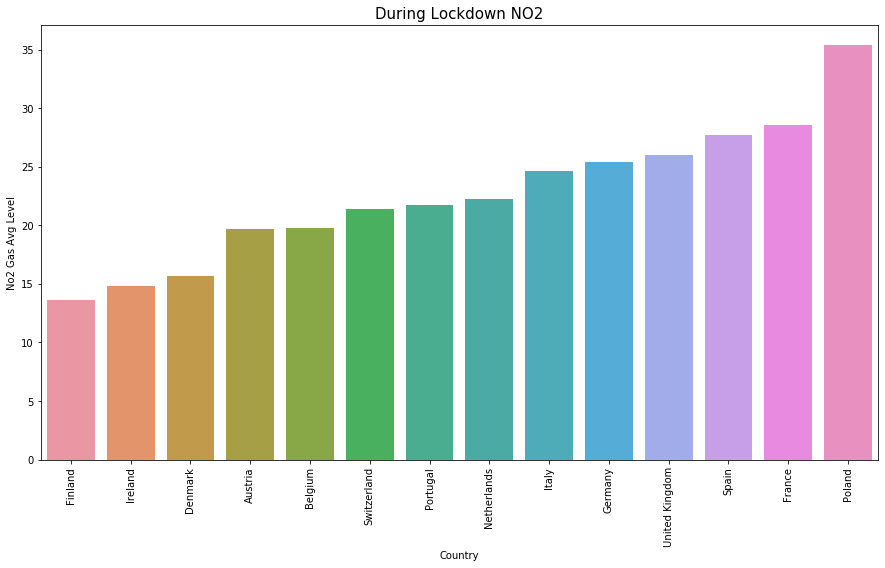

In [8]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Country", y="No2 Gas Avg Level", data=da)
ax.set_title('During Lockdown NO2',fontsize=15)
b=ax.get_xticklabels()
ax.set_xticklabels(b,rotation=90)
plt.show()

From the above graph we can clearly observe that during lockdown:

**35 $\mu g / m^3$ and above: Poland** is at the top of the list in NO2 concentration observing level at **35 $\mu g / m^3$** 

**Between 25 $\mu g/ m^3$ to 35 $\mu g / m^3$:** Top Europeon economic countries namely **France**, **Spain**, **United Kingdom**, **Germany** and **Italy** which are the most affected countries due to CoVid-19 falls under these ranges of No2 Air Quality Levels

**Between 20 $\mu g/ m^3$ to 25 $\mu g / m^3$:** In this range, countries like **Netherlands**, **Portugal**, **Swizerland**, **Belgium** and **Austria** are observed

**Below 20 $\mu g/ m^3$:** Lastly, **Denmark**, **Ireland** and **Finland** are being observed in the last 3 respective places 



In [9]:
data = {
        "Country":preseries.index,
        "No2 Gas Avg Level":preseries
        }
da = pd.DataFrame(data, columns = [ 'Country','No2 Gas Avg Level'])

Country
Finland           20.542016
Denmark           21.387247
Ireland           22.120585
Austria           22.714234
Switzerland       23.307381
Portugal          26.132108
Belgium           29.947115
Germany           31.099391
Netherlands       31.478909
Spain             35.279890
United Kingdom    35.972445
Italy             38.809293
France            39.387596
Poland            39.634133
Name: AirQualityLevel, dtype: float64


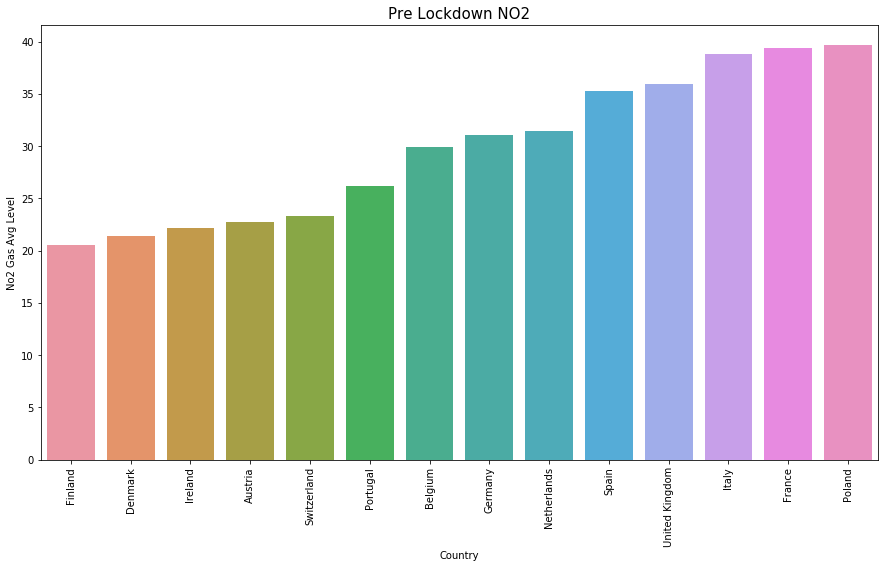

In [10]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Country", y="No2 Gas Avg Level", data=da)
ax.set_title('Pre Lockdown NO2',fontsize=15)
b=ax.get_xticklabels()
ax.set_xticklabels(b,rotation=90)
print(preseries)
plt.show()

From the above graph, the levels, recorded for NO2 before lockdown, were highers for each country. The following graph will present the comparison better.

This complements our claim that the Lockdown has brought a positive impact of the Air Quality Index

### NO2 Level - Comparison of Countries (Pre Vs During Lockdown) 

In [11]:
PostPreGraph=[]
PostPreIndex=['Pre Locdown France','During LockDown France','Pre Locdown Germany','During LockDown Germany','Pre Locdown Italy','During LockDown Italy']
PostPreGraph.append(preseries['France'])
PostPreGraph.append(postseries['France'])
PostPreGraph.append(preseries['Germany'])
PostPreGraph.append(postseries['Germany'])
PostPreGraph.append(preseries['Italy'])
PostPreGraph.append(postseries['Italy'])
PostPreGraph
data = {
        "Condition":PostPreIndex,
        "No2 Gas Avg Level":PostPreGraph
        }
da = pd.DataFrame(data, columns = [ 'Condition','No2 Gas Avg Level'])


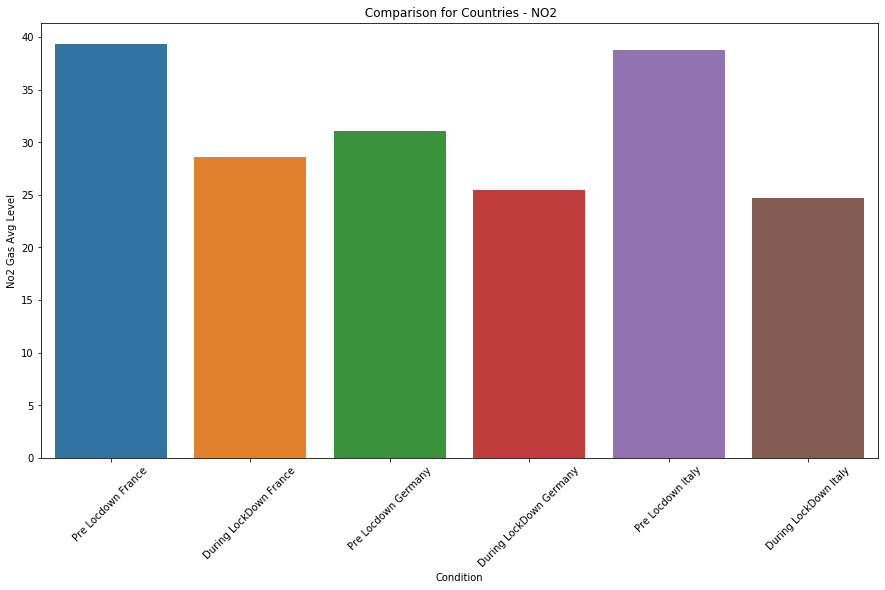

In [12]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Condition", y="No2 Gas Avg Level", data=da)
ax.set_title(' Comparison for Countries - NO2')
b=ax.get_xticklabels()
ax.set_xticklabels(b,rotation=45)
plt.show()

From the above graph, we can clearly see a significant drop in the NO2 concentration levels:

**France:**<br/>
**Pre-lockdown:** 39.38 $\mu g/ m^3$ as compared to **Post-lockdown:** 28.57 $\mu g/ m^3$

**Germany:**<br/>
**Pre-lockdown:** 31.09 $\mu g/ m^3$ as compared to **Post-lockdown:** 25.44 $\mu g/ m^3$

**Italy:**<br/>
**Pre-lockdown:** 38.80 $\mu g/ m^3$ as compared to **Post-lockdown:** 24.68 $\mu g/ m^3$

### PM10 Levels - Comparison of Pre and During Lockdown

In [13]:
postseriespm10=postlockdownpm10.groupby(pd.Grouper(key='Country')).AirQualityLevel.mean().sort_values()
preseriespm10=prelockdownpm10.groupby(pd.Grouper(key='Country')).AirQualityLevel.mean().sort_values()

In [14]:
data = {
        "Country":postseriespm10.index,
        "PM10 Gas Avg Level":postseriespm10
        }
da = pd.DataFrame(data, columns = [ 'Country','PM10 Gas Avg Level'])

Country
Ireland           13.118291
Finland           14.632713
Switzerland       15.973163
Belgium           16.161639
United Kingdom    16.210363
Spain             16.532985
Sweden            17.782472
Germany           18.057977
Netherlands       18.460976
France            18.848973
Portugal          19.275367
Denmark           20.871154
Italy             23.220820
Poland            34.800000
Name: AirQualityLevel, dtype: float64


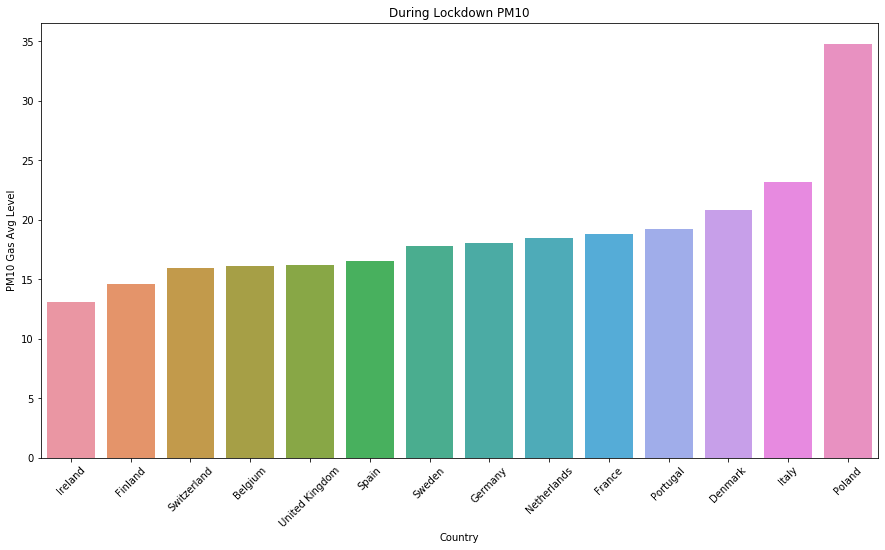

In [15]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Country", y="PM10 Gas Avg Level", data=da)
ax.set_title('During Lockdown PM10')
b=ax.get_xticklabels()
ax.set_xticklabels(b,rotation=45)
print(postseriespm10)
plt.show()

From the above graph we can clearly observe that during lockdown:

**34 $\mu g / m^3$ and above: Poland** is at the top of the list and the only country observing NO2 concentration level at **34.88 $\mu g / m^3$** 

**Between 20 $\mu g/ m^3$ to 25 $\mu g / m^3$:** Following Poland, **Denmark** and **Italy** are being observed next after significant drop in PM concentration levels as compared to Poland

**Between 15 $\mu g/ m^3$ to 20 $\mu g / m^3$:** In this range, most of the countries are being observed namely **Portugal**, **France**, **Netherlands**, **Germany**, **Sweden**, **Spain**, **UK**, **Beligum** and **Swizerland** are observed

**Below 15 $\mu g/ m^3$:** Lastly, **Finland** and **Ireland** are being observed in the last 2 respective places 

In [16]:
data = {
        "Country":preseriespm10.index,
        "PM10 Gas Avg Level":preseriespm10
        }
da = pd.DataFrame(data, columns = [ 'Country','PM10 Gas Avg Level'])

Country
Ireland           13.867868
Switzerland       17.105088
Finland           17.173636
Sweden            17.867659
Spain             17.971902
Belgium           18.329911
United Kingdom    20.688966
Portugal          21.233784
Netherlands       21.707804
Germany           22.672324
France            24.305902
Italy             25.467386
Denmark           26.198237
Poland            39.917446
Name: AirQualityLevel, dtype: float64


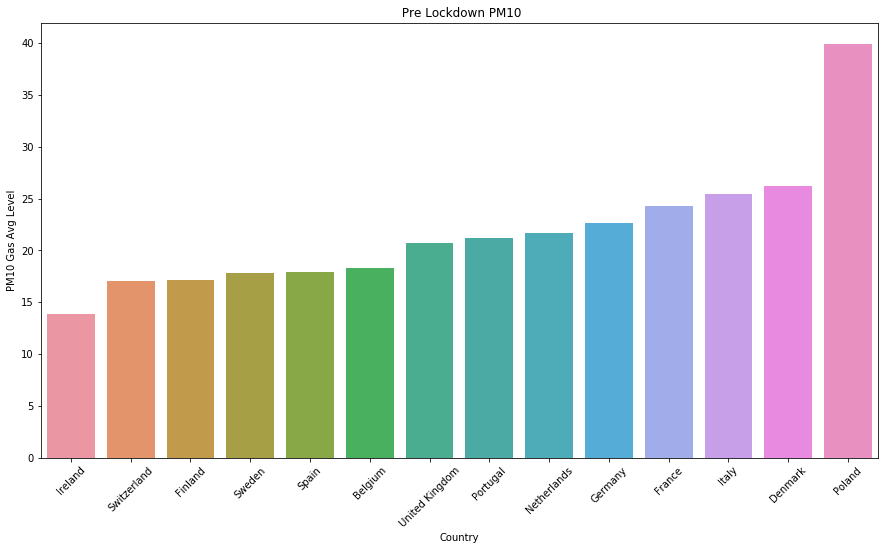

In [17]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Country", y="PM10 Gas Avg Level", data=da)
ax.set_title(' Pre Lockdown PM10')
b=ax.get_xticklabels()
ax.set_xticklabels(b,rotation=45)
print (preseriespm10)
plt.show()

From the above graph, the levels, recorded for PM10 before lockdown, recorded were highers for each country. 

**This complements our claim that the Lockdown has brought a positive impact of the Air Quality Index in terms of PM10 levels as well in NO2 levels**

### PM10 Level - Comparison of Countries (Pre Vs During Lockdown) 

In [18]:
PostPreGraph=[]
PostPreIndex=['Pre Lockdown France','During LockDown France','Pre Locdown Germany','During LockDown Germany','Pre Locdown Italy','During LockDown Italy']
PostPreGraph.append(preseriespm10['France'])
PostPreGraph.append(postseriespm10['France'])
PostPreGraph.append(preseriespm10['Germany'])
PostPreGraph.append(postseriespm10['Germany'])
PostPreGraph.append(preseriespm10['Italy'])
PostPreGraph.append(postseriespm10['Italy'])
PostPreGraph
data = {
        "Condition":PostPreIndex,
        "PM10 Gas Avg Level":PostPreGraph
        }
da = pd.DataFrame(data, columns = [ 'Condition','PM10 Gas Avg Level'])


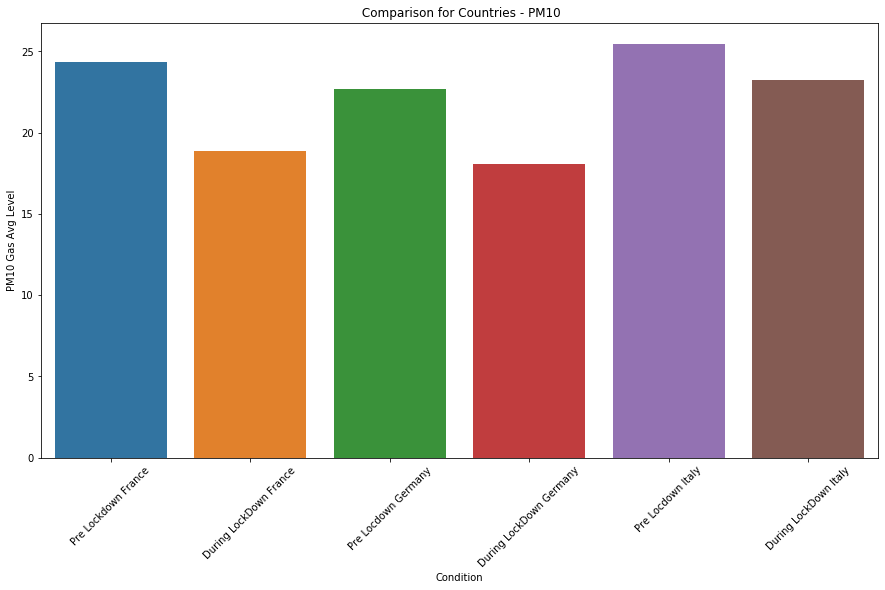

In [19]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Condition", y="PM10 Gas Avg Level", data=da)
ax.set_title(' Comparison for Countries - PM10')
b=ax.get_xticklabels()
ax.set_xticklabels(b,rotation=45)
plt.show()

From the above graph, we can clearly see a significant drop in the PM10 concentration levels:

**France:**<br/>
**Pre-lockdown:** 24.30 $\mu g/ m^3$ as compared to **Post-lockdown:** 18.84 $\mu g/ m^3$

**Germany:**<br/>
**Pre-lockdown:** 22.67 $\mu g/ m^3$ as compared to **Post-lockdown:** 18.05 $\mu g/ m^3$

**Italy:**<br/>
**Pre-lockdown:** 25.46 $\mu g/ m^3$ as compared to **Post-lockdown:** 23.22 $\mu g/ m^3$

### PM2.5 Levels - Comparison of Pre and During Lockdown

In [20]:
postseriespm25=postlockdownpm25.groupby(pd.Grouper(key='Country')).AirQualityLevel.mean().sort_values()
preseries25=prelockdownpm25.groupby(pd.Grouper(key='Country')).AirQualityLevel.mean().sort_values()
print(postseriespm25)

Country
Sweden             4.683981
Finland            5.013445
Ireland            8.336014
Denmark            8.838961
Netherlands        9.644565
Belgium            9.938009
United Kingdom     9.939925
Spain              9.947650
Switzerland       10.237821
Portugal          10.898787
Austria           12.228504
Italy             12.397743
Poland            26.667458
Name: AirQualityLevel, dtype: float64


In [21]:
dataa = {
        "Country":postseriespm25.index,
        "PM2.5 Gas Avg Level":postseriespm25
        }
daa = pd.DataFrame(dataa, columns = [ 'Country','PM2.5 Gas Avg Level'])

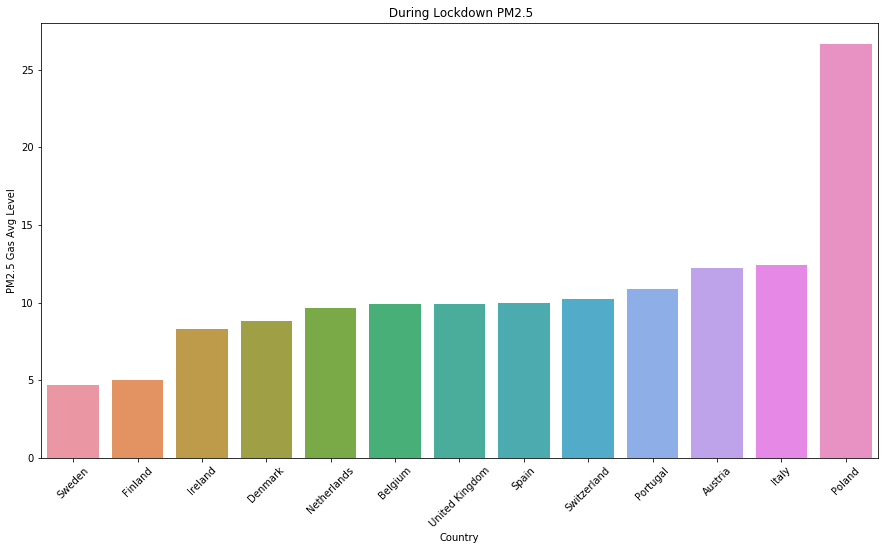

In [22]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Country", y="PM2.5 Gas Avg Level", data=daa)
ax.set_title(' During Lockdown PM2.5')
b=ax.get_xticklabels()
ax.set_xticklabels(b,rotation=45)
plt.show()

From the above graph we can clearly observe that during lockdown:

**25 $\mu g / m^3$ and above: Poland** is at the top of the list and the only country observing PM2.5 concentration level at **26.66 $\mu g / m^3$** 

**Between 10 $\mu g/ m^3$ to 20 $\mu g / m^3$:** Following Poland, A significant drop in concentration levels is being observed for countries namely **Italy**, **Austria**, **Portugal** and **Switzerland**

**Below 10 $\mu g/ m^3$:** Lastly, a considerable list of 8 countries fall under this range. **Spain**, **United Kingdom**, **Belgium** , **Netherlands** , **Denmark**, **Ireland**, **Finland** and **Sweden** are among this range of concentration levels

In [23]:
dataa = {
        "Country":preseries25.index,
        "PM2.5 Gas Avg Level":preseries25
        }
daa = pd.DataFrame(dataa, columns = [ 'Country','PM2.5 Gas Avg Level'])

Country
Sweden             5.906009
Finland            6.971171
Ireland            8.659988
Spain             10.376612
Portugal          11.304204
United Kingdom    11.753674
Belgium           12.459992
Switzerland       12.477060
Netherlands       12.735888
Denmark           12.740907
Italy             13.558310
Austria           14.458355
France            14.742817
Germany           15.786679
Poland            28.664177
Name: AirQualityLevel, dtype: float64


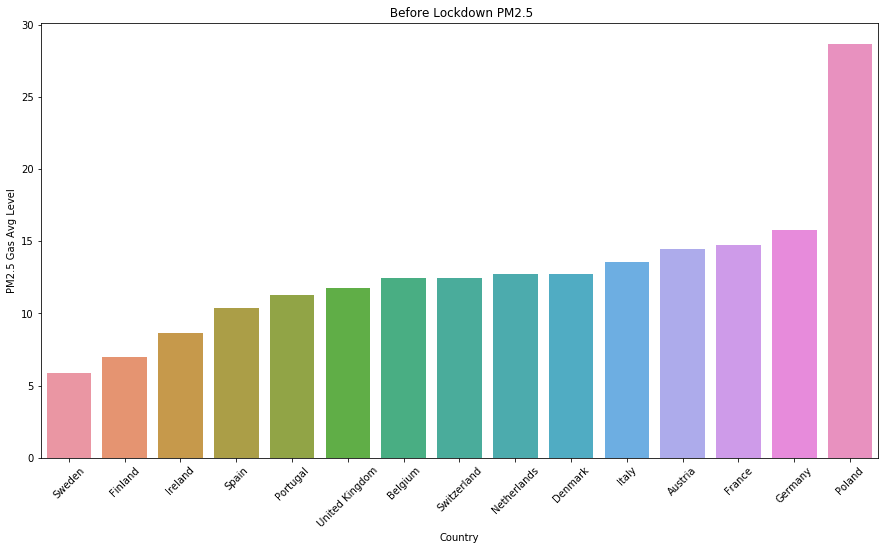

In [24]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Country", y="PM2.5 Gas Avg Level", data=daa)
ax.set_title(' Before Lockdown PM2.5')
b=ax.get_xticklabels()
ax.set_xticklabels(b,rotation=45)
print (preseries25)
plt.show()

From the above graph, the levels, recorded for PM2.5 before lockdown, recorded were highers for each country. 

In [25]:
PostPreGraph=[]
PostPreIndex=['Pre Lockdown United Kingdom','During LockDown United Kingdom','Pre Locdown Poland','During LockDown Poland','Pre Locdown Italy','During LockDown Italy']

PostPreGraph.append(preseries25['United Kingdom'])
PostPreGraph.append(postseriespm25['United Kingdom'])
PostPreGraph.append(preseries25['Poland'])
PostPreGraph.append(postseriespm25['Poland'])
PostPreGraph.append(preseries25['Italy'])
PostPreGraph.append(postseriespm25['Italy'])
PostPreGraph
data = {
        "Condition":PostPreIndex,
        "PM2.5 Gas Avg Level":PostPreGraph
        }
da = pd.DataFrame(data, columns = [ 'Condition','PM2.5 Gas Avg Level'])

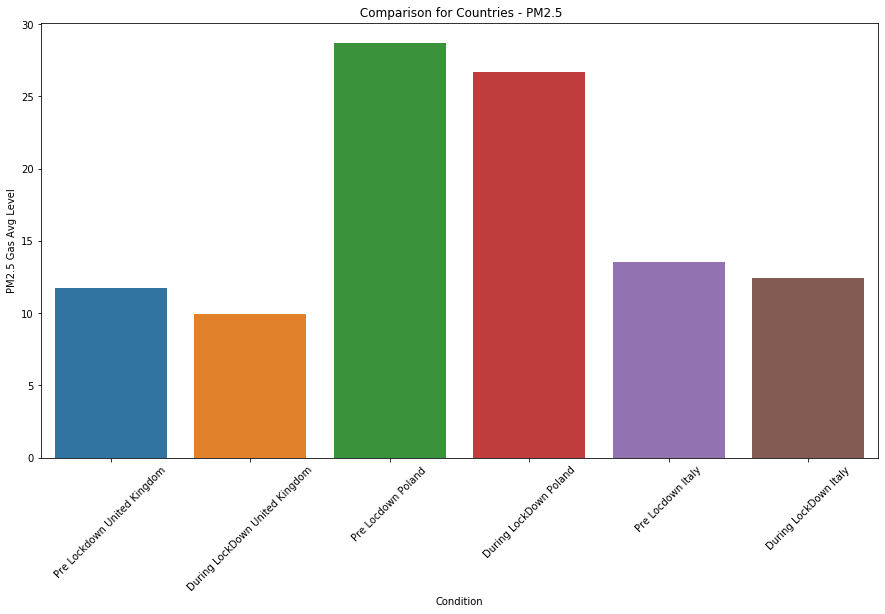

In [26]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Condition", y="PM2.5 Gas Avg Level", data=da)
ax.set_title(' Comparison for Countries - PM2.5')
b=ax.get_xticklabels()
ax.set_xticklabels(b,rotation=45)
plt.show()

From the above graph, we can clearly see a significant drop in the PM10 concentration levels except for Italy:

**United Kingdom:**<br/>
**Pre-lockdown:** 11.75 $\mu g/ m^3$ as compared to **Post-lockdown:** 9.93 $\mu g/ m^3$ 

**Poland:**<br/>
**Pre-lockdown:** 28.66 $\mu g/ m^3$ as compared to **Post-lockdown:** 26.66 $\mu g/ m^3$ 

**Italy:**<br/>
**Pre-lockdown:** 13.55 $\mu g/ m^3$ as compared to **Post-lockdown:** 12.39 $\mu g/ m^3$ 

### Concentration Level Timeline - Italy: NO2 Levels

In [27]:

postlocdownp25UK=postlockdownno2[postlockdownno2.Country=='Italy']

postlocdownp25UK.datebegin = pd.to_datetime(postlocdownp25UK.datebegin,format="%d/%m/%Y")

c=postlocdownp25UK.groupby(pd.Grouper(key='datebegin', freq='M')).AirQualityLevel.mean().sort_values()
print(c)

datebegin
2020-04-30    17.880114
2020-05-31    19.855325
2020-06-30    20.561111
2020-03-31    25.366022
2020-02-29    44.608122
Name: AirQualityLevel, dtype: float64


In [28]:
import calendar
monts=[]
for bb in range(0,len(c)):
    aa=str(c.index[bb]).split('-')
    monts.append(calendar.month_name[int(aa[1])])
    
    
print(monts)


['April', 'May', 'June', 'March', 'February']


In [29]:
dataa = {
        "Months":monts,
        "NO2 Gas Avg Level":c
        }
daa = pd.DataFrame(dataa, columns = [ 'Months','NO2 Gas Avg Level'])

In [30]:
print(daa)

              Months  NO2 Gas Avg Level
datebegin                              
2020-04-30     April          17.880114
2020-05-31       May          19.855325
2020-06-30      June          20.561111
2020-03-31     March          25.366022
2020-02-29  February          44.608122


In [31]:
daa = daa.sort_values(by="datebegin")

In [32]:
prelocdownp25UK=prelockdownno2[prelockdownno2.Country=='Italy']
prelocdownp25UK19=prelockdownno2[prelockdownno2.datebegin.str.contains('2019')]

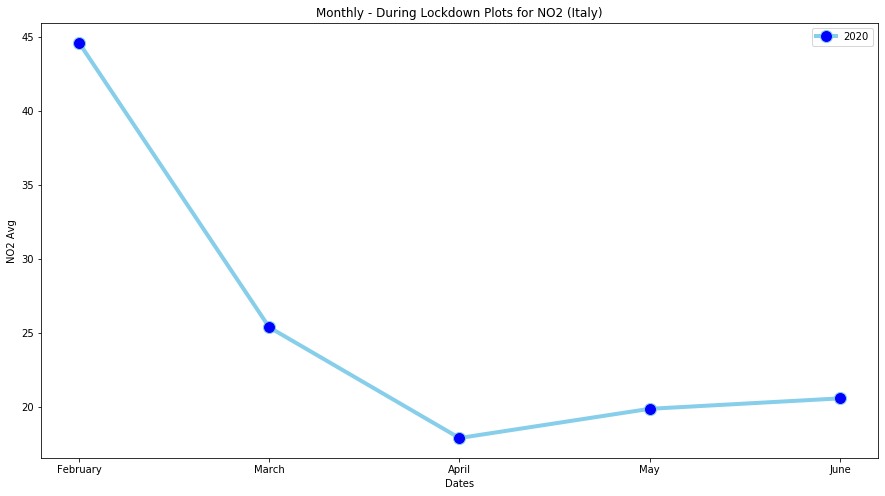

In [33]:
plt.figure(figsize=(15,8))
plt.plot( daa['Months'],daa['NO2 Gas Avg Level'], marker='o', markerfacecolor='blue', markersize=12, color='skyblue',label='2020', linewidth=4)

##plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.xlabel('Dates')
plt.title('Monthly - During Lockdown Plots for NO2 (Italy)')
plt.ylabel('NO2 Avg')
plt.legend()


In [34]:

monts=[]
prelocdownp25UK19.datebegin = pd.to_datetime(prelocdownp25UK19.datebegin)
prelocdownp25UK.datebegin = pd.to_datetime(prelocdownp25UK.datebegin,format="%d/%m/%Y")
dd=prelocdownp25UK19.groupby(pd.Grouper(key='datebegin', freq='M')).AirQualityLevel.mean().sort_values()
for bb in range(0,len(dd)):
    aa=str(dd.index[bb]).split('-')
    monts.append(calendar.month_name[int(aa[1])])
    

dataa = {
        "Months":monts,
        "NO2 Gas Avg Level":dd
        }
daa = pd.DataFrame(dataa, columns = [ 'Months','NO2 Gas Avg Level'])
daa = daa.sort_values(by="datebegin")

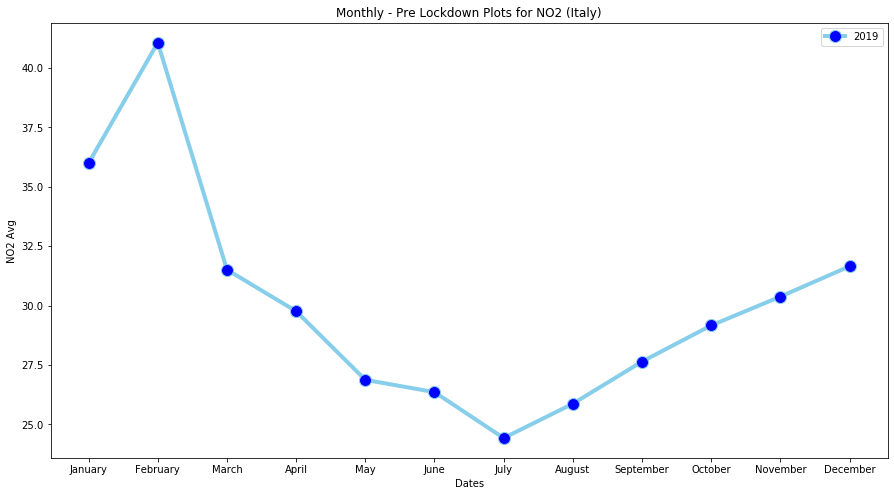

In [35]:
plt.figure(figsize=(15,8))
plt.plot( daa['Months'],daa['NO2 Gas Avg Level'], marker='o', markerfacecolor='blue', markersize=12, color='skyblue',label='2019', linewidth=4)

##plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.xlabel('Dates')
plt.title('Monthly - Pre Lockdown Plots for NO2 (Italy)')
plt.ylabel('NO2 Avg')
plt.legend()



### Interpretation:

From the Timeline of NO2 concentration levels for Italy it can be seen that NO2 levels were highers during pre lockdown and then started to decrease gradually since the lockdown was implemented.

We can take any country as an example in order to illustrate that the implementation of lockdown has brought a positive impact on the Air Quality

The above comparison graphs clearly depicts a positive outcome of lockdown since the concentration levels of NO2, PM2.5 and PM10 have gone significantly down during lockdown as compared to pre lockdown for all europeon countries. This implies that Government of respective countries took the threat of pandemic seriously and implemented strict lockdown and stay at home policies so as to save as many lives as possible. 

### Road Ahead

Moving forward, we are in dire need to check if there is any relationship between the time and concentration levels. With the graphs above complementing our claim of postive aspect during lockdown, a prediction model is better to build here so that we can check what would be the concentration levels in future if the lock down persists. How better the Air Quality can become? 

### CORRELATION MATRIX
Inorder to begin with our regression analysis, we will dig deep to have some insight about the co-factors as how they relate to each other. Doing this, we will have better understanding as to which co-factors will be the major affectors or predictors for the response variable.<br/>

Before generating the correlation matrix between NO2, PM2.5 and PM10 we need to sum up our dataset per month per country.

In [36]:
fil_pre_cor= prelockdown.pivot_table('AirQualityLevel', ['datebegin','Country'], 'AirPollutant')

In [37]:
fil_pre_cor

AirPollutant                  NO2       PM10      PM2.5
datebegin  Country                                     
01-01-2018 Belgium      17.700000   6.700000   4.333333
           Finland      10.200000   8.220000   6.620000
           France       18.788000  13.260000   5.916667
           Netherlands  23.557143  22.957143  15.000000
           Poland       43.500000  58.933333  39.033333
...                           ...        ...        ...
9/9/2019   Denmark      22.425000  13.800000   8.200000
           Ireland      14.460000   5.900000   2.650000
           Portugal     15.691667  23.080000  12.566667
           Sweden             NaN  14.800000   5.825000
           Switzerland  18.366667  11.900000   5.500000

[10844 rows x 3 columns]

In [38]:
pre_cor= fil_pre_cor.corr()

In [39]:
pre_cor

AirPollutant,NO2,PM10,PM2.5
AirPollutant,,,
NO2,1.000000,0.538147,0.510637
PM10,0.538147,1.000000,0.873137
PM2.5,0.510637,0.873137,1.000000


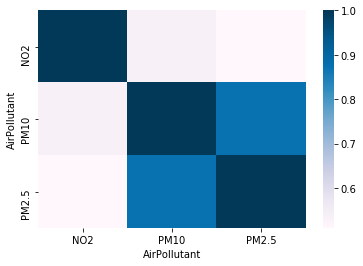

In [40]:
sns.heatmap(pre_cor, cmap= "PuBu")

#### Interpretation of Pre Lockdown Correlation Matrix (HeatMap)

1. There is positive correlation between all 3 variables
2. **PM 2.5** and **PM 10** have maximum **positive correlation** between eachother **(87%)** 
3. **NO2** is also positively correlated with **PM2.5 (51%)** and **PM10 (53%)** but lesser in comparison with correlation of PM2.5 and PM10 


From the above correlation matrix, we are in a better position to have a clear direction that we should pursue with our regression analysis.

In [41]:
fil_post_cor= postlockdown.pivot_table('AirQualityLevel', ['datebegin','Country'], 'AirPollutant')

In [42]:
fil_post_cor

AirPollutant                     NO2       PM10      PM2.5
datebegin  Country                                        
01-01-2020 Belgium         22.350000  19.700000  19.300000
           Finland         10.350000   9.660000   5.466667
           France          31.925000  27.666667        NaN
           Netherlands     27.500000  96.500000  73.000000
           Poland          23.975000  32.285714  22.866667
...                              ...        ...        ...
9/05/2020  Austria         21.093750        NaN   8.893548
           Germany         26.233333  17.577778        NaN
           Italy           23.736364  16.500000  10.285714
           Spain            5.595833  16.500000   9.371429
           United Kingdom  36.636364  32.525000  25.237500

[2283 rows x 3 columns]

In [43]:
post_cor= fil_post_cor.corr()

In [44]:
post_cor

AirPollutant,NO2,PM10,PM2.5
AirPollutant,,,
NO2,1.000000,0.513245,0.588018
PM10,0.513245,1.000000,0.855519
PM2.5,0.588018,0.855519,1.000000


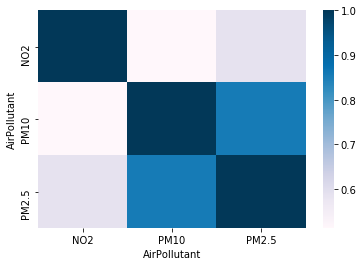

In [45]:
sns.heatmap(post_cor, cmap= "PuBu")

#### Interpretation of Post Lockdown Correlation Matrix (HeatMap)

1. There is positive correlation between all 3 variables
2. **PM 2.5** and **PM 10** have maximum **positive correlation** between eachother **(85%)** 
3. **NO2** is also positively correlated with **PM2.5 (58%)** and **PM10 (51%)** but lesser in comparison with correlation of PM2.5 and PM10 

#### Comparison of Pre Lockdown and Post Lockdown Correlation Matrices
1. In Post Lockdown, we have observed a decreasing trend in correlation between the variables as compared to Pre Lockdown period
2. The major decrease is seen in the correlation of NO2 with PM2.5 and PM10, observed at 51.32% and 58.88%, respectively, in Post Lockdown and compared to 51.06% and 53.81%, respectively, in Pre Lockdown

## Model - Multiple Regression for Pre and During Lockdown

Since, the course of this project is divided into 3 parts, namely:<br/>
1. Pre Lockdown
2. During Lockdown
3. Post Lockdown

Therefore, we will formulate 3 Linear Models for each period seperately.<br/> 

In applying Mutiple Linear Regression Analysis on our dataset, we will first convert the countries in categorical variables followed by convertion of the dates to numberical values.

The linear equation that we will be working upon will be as follows:<br/>
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + x_3 + x_4$<br/>
$y = \beta_0 + \beta X_1$

where: <br/>
$X_1 = x_1 + x_2 + x_3$ (considered as vector quantity)<br/>
$\beta = \beta_1 + \beta_2 + \beta_3$<br/>
$x_1$ = date<br/>
$x_2$ = name of the country<br/>


Here we are taking the datebegin column using parse_dates because if we import dataset into pandas the dates will come in as strings by default and will make some difficulty to work. So we are using parse_dates to change into timestamp. 

In [46]:
df = pd.read_csv('files/All_Data.csv', parse_dates = ['datebegin'])
df

,AirPollutant,AirQualityLevel,FilterStation,Country,TypeOfMeasurementStation,City,datebegin,validity_notation
0,PM10,31.6,1,Denmark,background,København,2018-01-01,1
1,PM10,16.7,1,Denmark,background,København,2018-01-02,1
2,PM10,11.2,1,Denmark,background,København,2018-01-03,1
3,PM10,8.5,1,Denmark,background,København,2018-01-04,1
4,PM10,6.4,1,Denmark,background,København,2018-01-05,1
...,...,...,...,...,...,...,...,...
296228,PM2.5,4.5,1,United Kingdom,traffic,London,2020-05-23,1
296229,PM2.5,5.0,1,United Kingdom,traffic,London,2020-05-24,1
296230,PM2.5,6.6,1,United Kingdom,traffic,London,2020-05-27,1
296231,PM2.5,5.7,1,United Kingdom,traffic,London,2020-05-31,1


Here we are using pivot table to get the values in rows to columns

In [47]:
df_pivot = df.pivot_table('AirQualityLevel', ['datebegin','Country'], 'AirPollutant')

In [48]:
df_pivot.head()

AirPollutant             NO2    PM10      PM2.5
datebegin  Country                             
2018-01-01 Austria  28.03125     NaN  27.033333
           Belgium  17.70000   6.700   4.333333
           Denmark  11.50000  27.575  18.800000
           Finland  10.20000   8.220   6.620000
           France   18.78800  13.260   5.916667

In [49]:
df_prelockdown = df_pivot.loc['2018-01-01':'2019-12-31']
df_prelockdown = df_prelockdown.reset_index()

In [50]:
df_prelockdown

AirPollutant,datebegin,Country,NO2,PM10,PM2.5
0,2018-01-01,Austria,28.031250,NaN,27.033333
1,2018-01-01,Belgium,17.700000,6.700000,4.333333
2,2018-01-01,Denmark,11.500000,27.575000,18.800000
3,2018-01-01,Finland,10.200000,8.220000,6.620000
4,2018-01-01,France,18.788000,13.260000,5.916667
...,...,...,...,...,...
10839,2019-12-31,Portugal,42.008333,45.262500,38.000000
10840,2019-12-31,Spain,68.154167,35.469231,29.042857
10841,2019-12-31,Sweden,NaN,13.741667,2.222222
10842,2019-12-31,Switzerland,28.066667,20.250000,20.900000


In [51]:
df_duringlockdown = df_pivot.loc['2020-01-01':'2020-05-31']
df_duringlockdown = df_duringlockdown.reset_index()

In [52]:
df_duringlockdown.head()

AirPollutant,datebegin,Country,NO2,PM10,PM2.5
0,2020-01-01,Austria,21.7125,NaN,19.119355
1,2020-01-01,Belgium,22.3500,19.700000,19.300000
2,2020-01-01,Denmark,9.5500,20.400000,10.500000
3,2020-01-01,Finland,10.3500,9.660000,5.466667
4,2020-01-01,France,31.9250,27.666667,NaN


In [53]:
df_prelockdown = df_prelockdown.dropna()

In [54]:
df_duringlockdown = df_duringlockdown.dropna()

Rounding of the values to avoid too much of decimals in the data using the round function.

In [55]:
df_prelockdown = df_prelockdown.round(decimals= 1)
df_duringlockdown = df_duringlockdown.round(decimals= 1)

In [56]:
df_prelockdown.head()

AirPollutant,datebegin,Country,NO2,PM10,PM2.5
1,2018-01-01,Belgium,17.7,6.7,4.3
2,2018-01-01,Denmark,11.5,27.6,18.8
3,2018-01-01,Finland,10.2,8.2,6.6
4,2018-01-01,France,18.8,13.3,5.9
5,2018-01-01,Germany,22.0,22.7,24.1


In [57]:
df_duringlockdown.head()

AirPollutant,datebegin,Country,NO2,PM10,PM2.5
1,2020-01-01,Belgium,22.4,19.7,19.3
2,2020-01-01,Denmark,9.6,20.4,10.5
3,2020-01-01,Finland,10.4,9.7,5.5
6,2020-01-01,Ireland,33.8,32.4,36.4
7,2020-01-01,Netherlands,27.5,96.5,73.0


Converting the date to the numerical value to give it as input for the model.

In [58]:
df_prelockdown.datebegin = pd.to_datetime(df_prelockdown.datebegin, infer_datetime_format = True)
df_prelockdown.datebegin = df_prelockdown.datebegin.map(dt.datetime.toordinal)

We are using the label encoder to convert the data into numerical  data.

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### Model for prelockdown

In [60]:
df_le = df_prelockdown
df_le.Country = le.fit_transform(df_le.Country)
df_le.head(5)

AirPollutant,datebegin,Country,NO2,PM10,PM2.5
1,736695,0,17.7,6.7,4.3
2,736695,1,11.5,27.6,18.8
3,736695,2,10.2,8.2,6.6
4,736695,3,18.8,13.3,5.9
5,736695,4,22.0,22.7,24.1


In [61]:
print('The classes are :', le.classes_)

The classes are : ['Belgium' 'Denmark' 'Finland' 'France' 'Germany' 'Ireland' 'Italy'
 'Netherlands' 'Poland' 'Portugal' 'Spain' 'Switzerland' 'United Kingdom']


In [62]:
X = df_le.drop(['PM10'], axis=1)
y = df_le["PM10"]

#### Splitting Dataset: Train and Test Split  

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [64]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (6408, 4)
y_train shape:  (6408,)
X_test shape:  (2137, 4)
y_test shape:  (2137,)


#### Making Linear Regression Model

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Testing Our Model for Test Data

In [66]:
predicted = lr.predict(X_test)

In [67]:
r2 = r2_score(y_test, predicted)
print("R Squared:", r2)

R Squared: 0.8372263489848315


Here, the value of **R squared (for Pre-LockDown)** is observed to be **83.72%** which means that our model is 83.72% **correctly** predicting the test data. This implies that our model is good fit for predicting the values of NO2, PM2.5 and PM10 for categorical variables (i.e. Countries).

16.18% inaccuracy is being observed which fairly acceptable.

### Predicting with values

In [68]:
dat1=["2020-06-08","2020-06-12"]
dat2=['6','6']
dat3=['17.9','14.7']
dat4=['15.3','8.9']
data1 = {
        'datebegin':dat1,
        'Country':dat2,
        'NO2':dat3 ,
        'PM2.5':dat4
         }
df1 = pd.DataFrame(data1, columns = ['datebegin','Country','NO2','PM2.5'])
df1['datebegin'] = pd.to_datetime(df1['datebegin'])
df1['datebegin'] = df1['datebegin'].map(dt.datetime.toordinal)

In [69]:
print('The prediction of PM10 for 2020-06-08 and 2020-06-12 is :', lr.predict(df1))

The prediction of PM10 for 2020-06-08 and 2020-06-12 is : [22.99331081 15.58730746]


### Model for during lockdown

In [70]:
df_duringlockdown.datebegin = pd.to_datetime(df_duringlockdown.datebegin, infer_datetime_format = True)
df_duringlockdown.datebegin = df_duringlockdown.datebegin.map(dt.datetime.toordinal)

In [71]:
df_le = df_duringlockdown
df_le.Country = le.fit_transform(df_le.Country)
df_le.head(5)

AirPollutant,datebegin,Country,NO2,PM10,PM2.5
1,737425,0,22.4,19.7,19.3
2,737425,1,9.6,20.4,10.5
3,737425,2,10.4,9.7,5.5
6,737425,3,33.8,32.4,36.4
7,737425,5,27.5,96.5,73.0


In [72]:
X = df_le.drop(['PM10'],axis=1)
y = df_le["PM10"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [74]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1026, 4)
y_train shape:  (1026,)
X_test shape:  (342, 4)
y_test shape:  (342,)


In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
predicted = lr.predict(X_test)

In [77]:
r2 = r2_score(y_test, predicted)
print("R Squared:", r2)

R Squared: 0.781756545187706


Here, the value of **R squared (for During-LockDown)** is observed to be **78.17%** which means that our model is 78.17% **correctly** predicting the test data or we can say that the accuracy of this model in prediction is 78.17%. This implies that our model is good fit for predicting the values of NO2, PM2.5 and PM10 for categorical variables (i.e. Countries).

21.83% inaccuracy is being observed which fairly acceptable.

### Predicting the values

In [78]:
dat1=["2020-06-08","2020-06-12"]
dat2=['6','6']
dat3=['17.9','14.7']
dat4=['15.3','8.9']
data1 = {
        'datebegin':dat1,
        'Country':dat2,
        'PM10':dat3 ,
        'PM2.5':dat4
         }
df1 = pd.DataFrame(data1, columns = ['datebegin','Country','PM10','PM2.5'])
df1['datebegin'] = pd.to_datetime(df1['datebegin'])
df1['datebegin'] = df1['datebegin'].map(dt.datetime.toordinal)

In [79]:
print('The prediction of PM10 for 2020-06-08 and 2020-06-12 is :', lr.predict(df1))

The prediction of PM10 for 2020-06-08 and 2020-06-12 is : [24.44351116 17.37327654]


## Model for NO2 values pre-lockdown


In [80]:
df_le = df_prelockdown
df_le.Country = le.fit_transform(df_le.Country)
df_le.head(10)

AirPollutant,datebegin,Country,NO2,PM10,PM2.5
1,736695,0,17.7,6.7,4.3
2,736695,1,11.5,27.6,18.8
3,736695,2,10.2,8.2,6.6
4,736695,3,18.8,13.3,5.9
5,736695,4,22.0,22.7,24.1
6,736695,5,6.8,11.3,6.0
7,736695,6,42.9,76.2,41.9
8,736695,7,23.6,23.0,15.0
9,736695,8,43.5,58.9,39.0
10,736695,9,45.5,46.1,27.8


In [81]:
X = df_le[["datebegin","Country"]]
y = df_le["NO2"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [83]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (6408, 2)
y_train shape:  (6408,)
X_test shape:  (2137, 2)
y_test shape:  (2137,)


In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
predicted = lr.predict(X_test)

In [86]:
r2 = r2_score(y_test, predicted)
print("R Squared:", r2)

R Squared: 0.04517163326838458


### Making predictions

In [87]:
dat1=["2020-06-08","2020-06-12"]
dat2=['6','6']
data1 = {
        'datebegin':dat1,
        'Country':dat2
         }
df1 = pd.DataFrame(data1, columns = ['datebegin','Country'])
df1['datebegin'] = pd.to_datetime(df1['datebegin'])
df1['datebegin'] = df1['datebegin'].map(dt.datetime.toordinal)

In [88]:
print('The prediction of NO2 for 2020-06-08 and 2020-06-12 is :', lr.predict(df1))

The prediction of NO2 for 2020-06-08 and 2020-06-12 is : [24.54696973 24.5061045 ]


## Model for PM 10 values pre-lockdown

In [89]:
X = df_le[["datebegin","Country"]]
y = df_le["PM10"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [91]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (6408, 2)
y_train shape:  (6408,)
X_test shape:  (2137, 2)
y_test shape:  (2137,)


In [92]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
predicted = lr.predict(X_test)

In [94]:
r2 = r2_score(y_test, predicted)
print("R Squared:", r2)

R Squared: 0.017482521515218452


### Making predicitons

In [95]:
dat1=["2020-06-08","2020-06-12"]
dat2=['6','6']
data1 = {
        'datebegin':dat1,
        'Country':dat2
         }
df1 = pd.DataFrame(data1, columns = ['datebegin','Country'])
df1['datebegin'] = pd.to_datetime(df1['datebegin'])
df1['datebegin'] = df1['datebegin'].map(dt.datetime.toordinal)

In [96]:
print('The prediction of PM10 for 2020-06-08 and 2020-06-12 is :', lr.predict(df1))

The prediction of PM10 for 2020-06-08 and 2020-06-12 is : [17.52239829 17.49112133]


## Model for PM 2.5 values pre-lockdown

In [97]:
X = df_le[["datebegin","Country"]]
y = df_le["PM2.5"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [99]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (6408, 2)
y_train shape:  (6408,)
X_test shape:  (2137, 2)
y_test shape:  (2137,)


In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
predicted = lr.predict(X_test)

In [102]:
r2 = r2_score(y_test, predicted)
print("R Squared:", r2)

R Squared: 0.023208156311190886


### Making predicitions

In [103]:
dat1=["2020-06-08","2020-06-12"]
dat2=['6','6']
data1 = {
        'datebegin':dat1,
        'Country':dat2
         }
df1 = pd.DataFrame(data1, columns = ['datebegin','Country'])
df1['datebegin'] = pd.to_datetime(df1['datebegin'])
df1['datebegin'] = df1['datebegin'].map(dt.datetime.toordinal)

In [104]:
print('The prediction of PM2.5 for 2020-06-08 and 2020-06-12 is :', lr.predict(df1))

The prediction of PM2.5 for 2020-06-08 and 2020-06-12 is : [9.64407851 9.62072072]


## Model for NO2 during lockdown

In [105]:
df_le = df_duringlockdown
df_le.Country = le.fit_transform(df_le.Country)
df_le.head(5)

AirPollutant,datebegin,Country,NO2,PM10,PM2.5
1,737425,0,22.4,19.7,19.3
2,737425,1,9.6,20.4,10.5
3,737425,2,10.4,9.7,5.5
6,737425,3,33.8,32.4,36.4
7,737425,5,27.5,96.5,73.0


In [106]:
X = df_le[["datebegin","Country"]]
y = df_le["NO2"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [108]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1026, 2)
y_train shape:  (1026,)
X_test shape:  (342, 2)
y_test shape:  (342,)


In [109]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
predicted = lr.predict(X_test)

In [111]:
r2 = r2_score(y_test, predicted)
print("R Squared:", r2)

R Squared: 0.22244059904506952


### Making predictions

In [112]:
dat1=["2020-06-08","2020-06-12"]
dat2=['6','6']
data1 = {
        'datebegin':dat1,
        'Country':dat2
         }
df1 = pd.DataFrame(data1, columns = ['datebegin','Country'])
df1['datebegin'] = pd.to_datetime(df1['datebegin'])
df1['datebegin'] = df1['datebegin'].map(dt.datetime.toordinal)

In [113]:
print('The prediction of NO2 for 2020-06-08 and 2020-06-12 is :', lr.predict(df1))

The prediction of NO2 for 2020-06-08 and 2020-06-12 is : [13.7578185  13.33873945]


## Model for PM10 during lockdown

In [114]:
X = df_le[["datebegin","Country"]]
y = df_le["PM10"]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [116]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1026, 2)
y_train shape:  (1026,)
X_test shape:  (342, 2)
y_test shape:  (342,)


In [117]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
predicted = lr.predict(X_test)

In [119]:
r2 = r2_score(y_test, predicted)
print("R Squared:", r2)

R Squared: 0.009327819287342054


### Making predictions

In [120]:
dat1=["2020-06-08","2020-06-12"]
dat2=['6','6']
data1 = {
        'datebegin':dat1,
        'Country':dat2
         }
df1 = pd.DataFrame(data1, columns = ['datebegin','Country'])
df1['datebegin'] = pd.to_datetime(df1['datebegin'])
df1['datebegin'] = df1['datebegin'].map(dt.datetime.toordinal)

In [121]:
print('The prediction of PM10 for 2020-06-08 and 2020-06-12 is :', lr.predict(df1))

The prediction of PM10 for 2020-06-08 and 2020-06-12 is : [15.94020938 15.81419176]


## Model for PM2.5 during lockdown

In [122]:
X = df_le[["datebegin","Country"]]
y = df_le["PM2.5"]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [124]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1026, 2)
y_train shape:  (1026,)
X_test shape:  (342, 2)
y_test shape:  (342,)


In [125]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
predicted = lr.predict(X_test)

In [127]:
r2 = r2_score(y_test, predicted)
print("R Squared:", r2)

R Squared: 0.04562813975673752


### Making predictions

In [128]:
dat1=["2020-06-08","2020-06-12"]
dat2=['6','6']
data1 = {
        'datebegin':dat1,
        'Country':dat2
         }
df1 = pd.DataFrame(data1, columns = ['datebegin','Country'])
df1['datebegin'] = pd.to_datetime(df1['datebegin'])
df1['datebegin'] = df1['datebegin'].map(dt.datetime.toordinal)

In [129]:
print('The prediction of PM2.5 for 2020-06-08 and 2020-06-12 is :', lr.predict(df1))

The prediction of PM2.5 for 2020-06-08 and 2020-06-12 is : [7.70870063 7.55034844]


### ARIMA Model for Italy
ARIMA model, we can forecast a time series using the series previous values. A time series is a sequence of metric which is recorded over regular time intervals depending on the frequency, a time series can be of yearly,monthly and quaterly, daily and hourly. ARIMA, short for Auto Regressive Integrated Moving Average is actually a class of models which explains given time series based on its own previous values, that is its own lags and the lagged forecast errors, so it will be used to forecast future values. An ARIMA model is characterized by 3 terms: p, d, q. p.

In [130]:
data = df
data = data[data.AirPollutant == 'PM10']
data = data[data.Country == 'Italy']

In [131]:
data['Date'] = pd.to_datetime(data['datebegin'], infer_datetime_format = True)

In [132]:
data = data.set_index(['Date'])

In [133]:
data = data.drop(columns=['AirPollutant','FilterStation','Country','TypeOfMeasurementStation','City','validity_notation'])

In [134]:
data = data.groupby(pd.Grouper(freq = 'M')).mean() 

In [135]:
data.head()

,AirQualityLevel
Date,
2018-01-31,34.572222
2018-02-28,25.848485
2018-03-31,24.061453
2018-04-30,31.810734
2018-05-31,23.016260


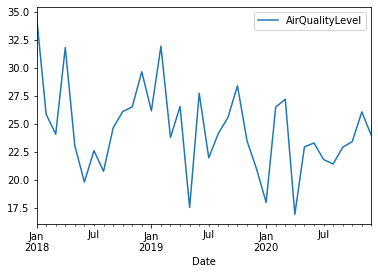

In [136]:
data.plot()
plt.show()

Here we are conducting the Augmented Dickey Fuller test to check whether the data is stationary or not.

In [137]:
from statsmodels.tsa.stattools import adfuller
print('Results:')
dftest = adfuller(data['AirQualityLevel'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Stat', 'P-value', 'Lags used', 'Obsevations'])
for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key] = value
print(dfoutput)

Results:
Test Stat             -6.020331e+00
P-value                1.499066e-07
Lags used              0.000000e+00
Obsevations            3.500000e+01
Critical value(1%)    -3.632743e+00
Critical value(5%)    -2.948510e+00
Critical value(10%)   -2.613017e+00
dtype: float64


P-value is less than 0.05 and the critical values are greater than Test stats, So we are rejecting null hypothesis and can be concluded as the data is stationary. Stationary means mean, variance and covariance is constant over the period.

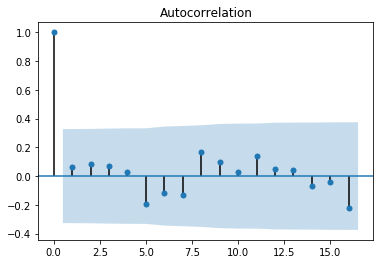

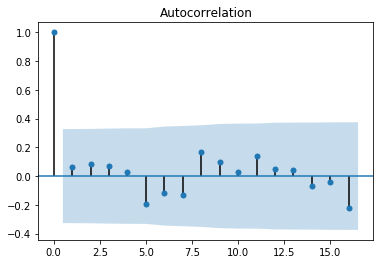

In [138]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

By observing the above graph, we can say that the series is stationary, there is no trend.

Here we are using ARIMA model and it is having three parameters. p is the months taken for autoregression model. d is the order of integration and q is the period in moving average model.

In [139]:
from statsmodels.tsa.arima_model import ARIMA
#ARIMA model
model = ARIMA(data, order = (12,0,0))
result_ARIMA = model.fit()
predictions_ARIMA = pd.Series(result_ARIMA.fittedvalues, copy = True)

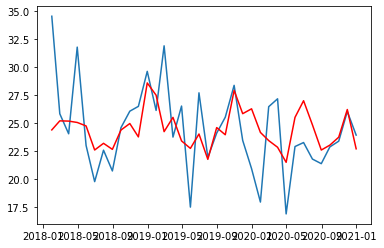

In [140]:
plt.plot(data)
plt.plot(predictions_ARIMA,color = 'red')

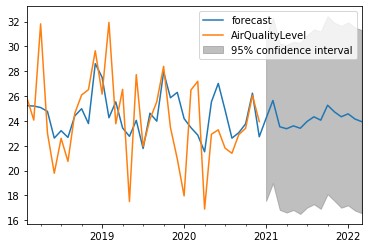

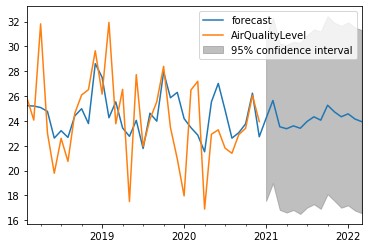

In [141]:
result_ARIMA.plot_predict(1,50)

The MSE values closer to zero are better.

In [142]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(data,predictions_ARIMA))
print('MSE: ',metrics.mean_squared_error(data,predictions_ARIMA))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(data,predictions_ARIMA)))

MAE:  2.635685951551695
MSE:  12.462892031218821
RMSE:  3.5302821461207348


Predictions for next five months

In [143]:
result_ARIMA.forecast(steps = 5)

(array([24.20925335, 25.64405067, 23.52397571, 23.36563353, 23.59671853]),
 array([3.39715341, 3.39834329, 3.41288051, 3.4440034 , 3.4572439 ]),
 array([[17.550955  , 30.86755169],
        [18.98342022, 32.30468113],
        [16.83485283, 30.2130986 ],
        [16.6155109 , 30.11575616],
        [16.82064501, 30.37279206]]))

### CONCLUSIONS

**Multiple Linear Regression Model**

To conclude, we have performed Multiple Linear Regression on the particulate matter(y variable) and days(x variable) for any particular country(unique value) and results given have a significant accuracy for both pre lock down models and post lock down models

The **R- Squared** Value for **Pre-lockdown model is 83.72%** where as the R-Squared Value for **Post-Lockdown model is 78.17%**

The **PM10** concentration level prediction based on Pre-Lockdown model for Italy in June 6, 2020 and June 12, 2020 is 22.93$\mu g/ m^3$ and 15.58$\mu g/ m^3$ respectively

The **PM10** concentration level prediction based on Post-Lockdown model for Italy in June 6, 2020 and June 12, 2020 is 24.44$\mu g/ m^3$ and 17.37$\mu g/ m^3$ respectively

More precision is observed in this model

R2 value is high and acceptable

The predicted values for the model for individual particulates show values that are more grounded to reality despite low accuracy scores

**ARIMA Model**

Using ARIMA Model for Italy, we have concluded the Air Quality Concentration levels over a time series, and tried to predict the values for the next years. The data is observed to be stationary since the p-value is calculated less than 0.05 and the critical values are values are greater than test statistics value. Based on the data given for building this model, the RMSE value is observed to be close to 0 which depicts that the model is good in predicting the values of particulate matters in the future months

The value prediction from ARIMA model and Multiple Linear Regression Model seems to be in the same range.
For Example: Arima has predicted the values for PM10 in the range of 24$\mu g/ m^3$ - 26$\mu g/ m^3$ where as Multiple Linear Regression Model has predicted the values as 22.93$\mu g/ m^3$ and 24.44$\mu g/ m^3$ which are fairly close to each other